In [1]:
from plcoding.cpp_core.monotone import MCPolarIterator
import numpy as np
from tqdm import trange

In [2]:
src_bases = np.array([2, 2], dtype=int)
src_probs = np.array([0.05, 0.06, 0.60, 0.29])
code_len = 1024
monotone_chain = np.concatenate([np.zeros((code_len,), dtype=int), np.ones((code_len,), dtype=int)])
pIter = MCPolarIterator(code_len, src_bases)
pIter.set_priors(np.tile(src_probs, (code_len, 1)))

In [3]:
Hs = np.zeros((code_len, src_bases.size))
test_times = 100
for t in trange(test_times, ncols=80):
    pIter.reset()
    headers = np.zeros(src_bases.size, dtype=int)
    for i in range(len(monotone_chain)):
        # 获取译码位置
        var = monotone_chain[i]
        index = headers[var]
        headers[var] += 1
        # 保存条件概率
        prob = np.abs(pIter.get_prob(var, index))
        Hs[index, var] += (-np.log2(prob + 1e-100) * prob).sum() / test_times
        # 设置译码结果
        symbol = np.random.choice(a=len(prob), p=prob)
        pIter.set_prob(var, index, symbol)

100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.52it/s]


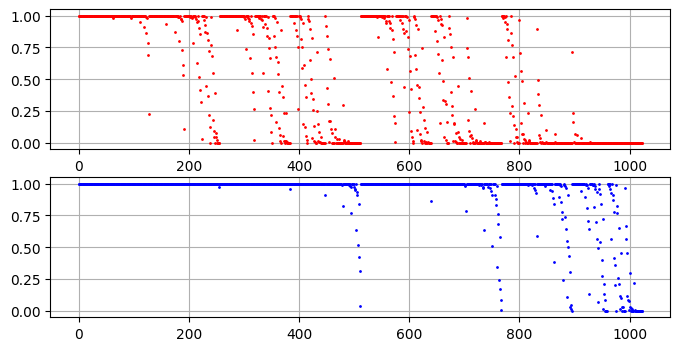

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 4))
# 绘制第一个变量的极化熵
plt.subplot(2, 1, 1)
plt.plot(Hs[:, 0], "r.", ms=2)
plt.grid()
# 绘制第一个变量的极化熵
plt.subplot(2, 1, 2)
plt.plot(Hs[:, 1], "b.", ms=2)
plt.grid()
# 绘图
plt.show()